<a href="https://colab.research.google.com/github/Ekaterinnna/PyAn/blob/main/PyAn_hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Условие 1: Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###1.1. 
Скачать данные в закрепе к уроку (данные по недвижимости)

In [94]:
df = pd.read_csv('kc_house_data.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

###1.2 
Изучите стоимости недвижимости

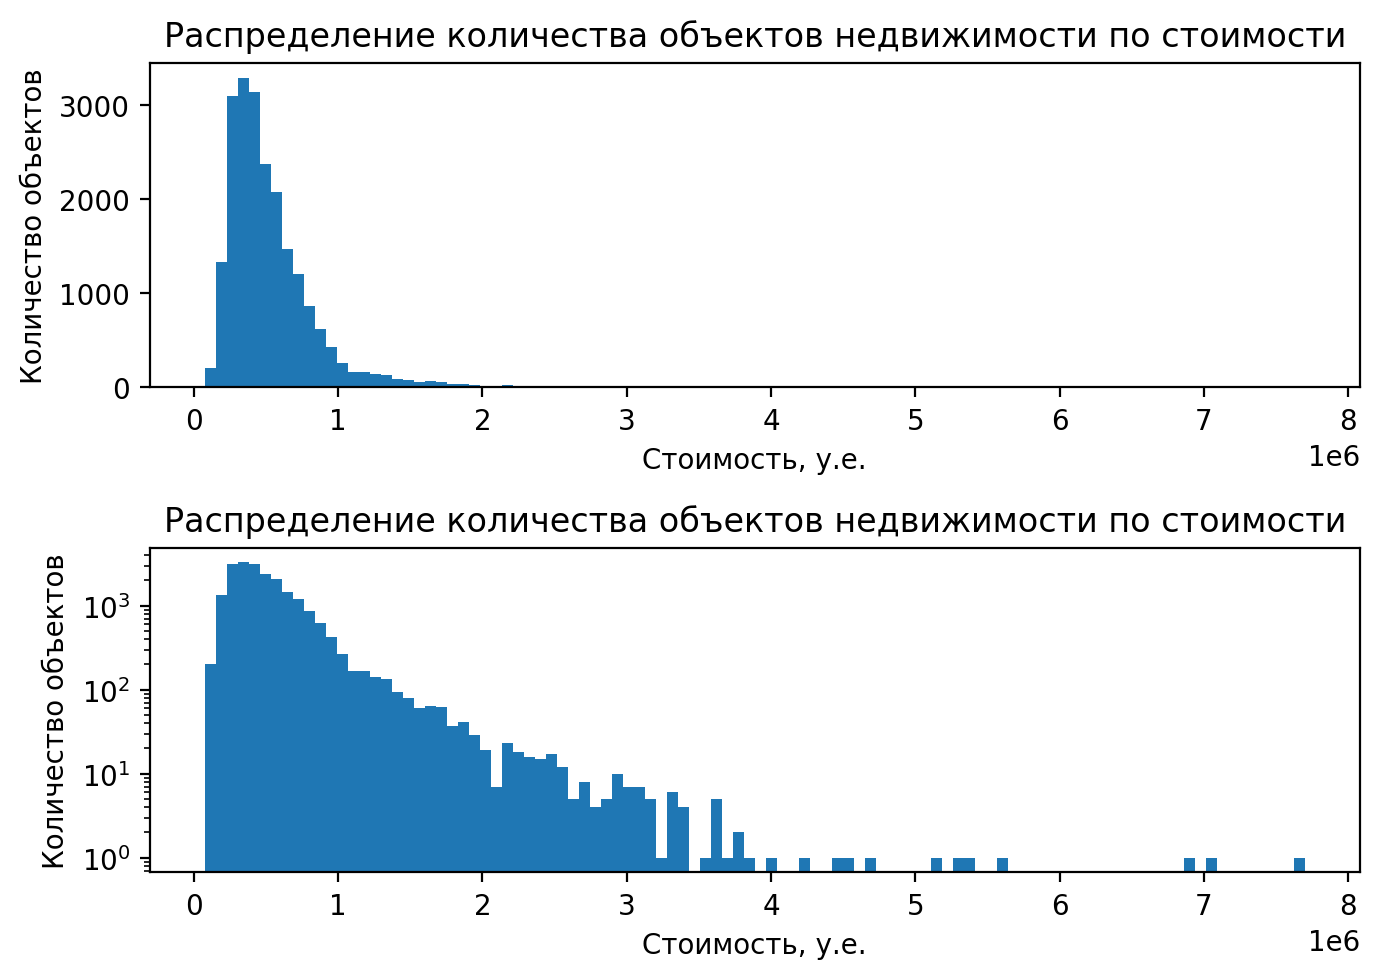

In [25]:
fig, axs = plt.subplots(2, 1, figsize=(7,5), dpi=200)
for i in range(2):
  axs[i].hist(df['price'], bins=100)
  axs[i].set_title('Распределение количества объектов недвижимости по стоимости')
  axs[i].set_xlabel('Стоимость, у.е.')
  axs[i].set_ylabel('Количество объектов')
axs[1].set_yscale('log')
plt.tight_layout()
plt.show()

###1.3 
Изучите распределение квадратуры жилой

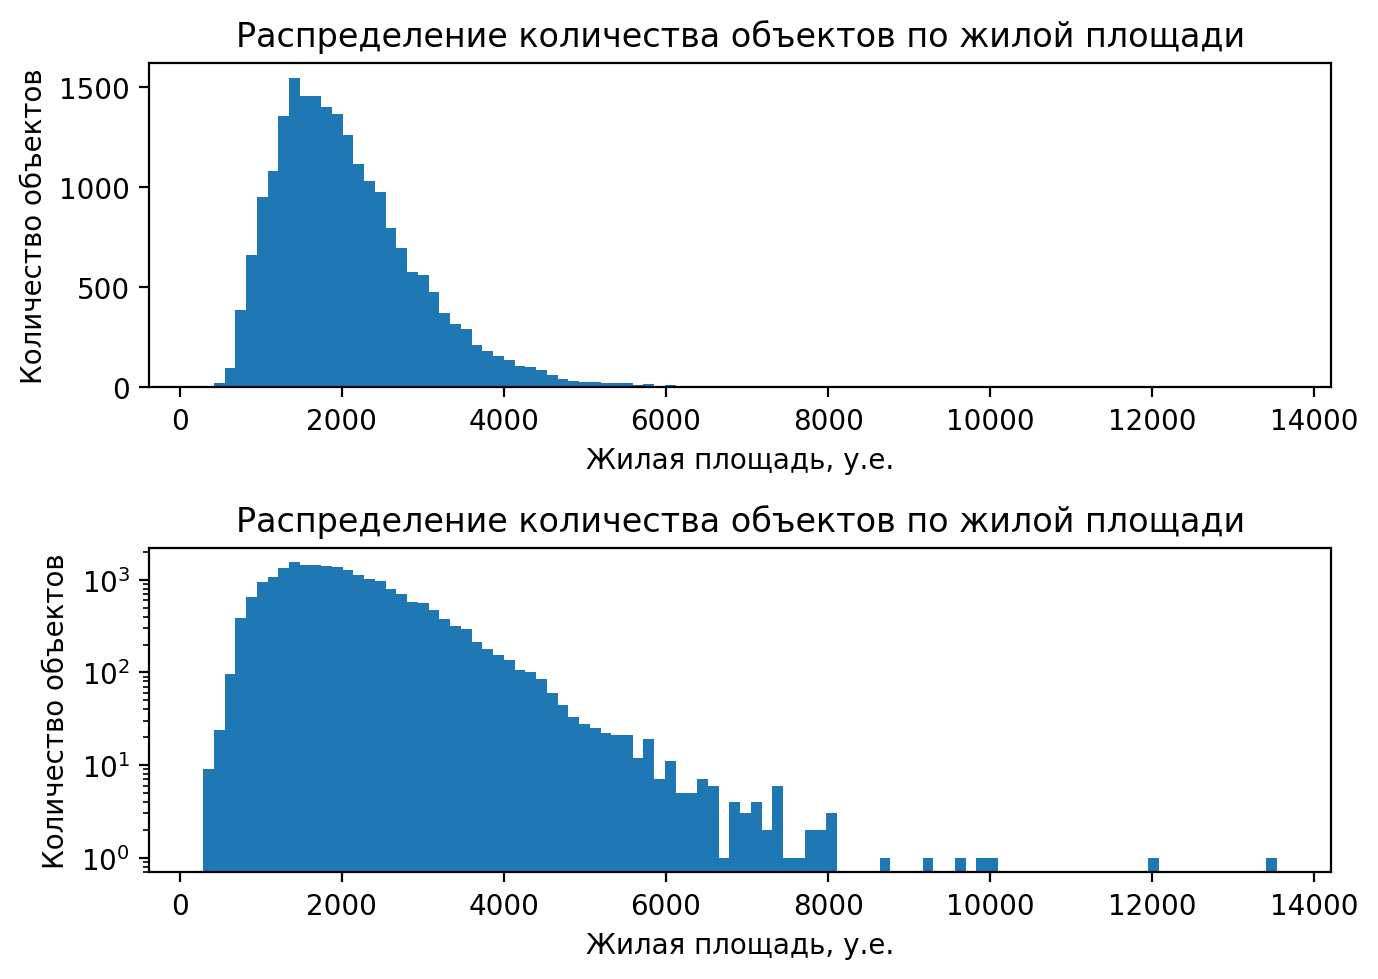

In [26]:
fig, axs = plt.subplots(2, 1, figsize=(7,5), dpi=200)
for i in range(2):
  axs[i].hist(df['sqft_living'], bins=100)
  axs[i].set_title('Распределение количества объектов по жилой площади')
  axs[i].set_xlabel('Жилая площадь, у.е.')
  axs[i].set_ylabel('Количество объектов')
axs[1].set_yscale('log')
plt.tight_layout()
plt.show()

###1.4 
Изучите распределение года постройки

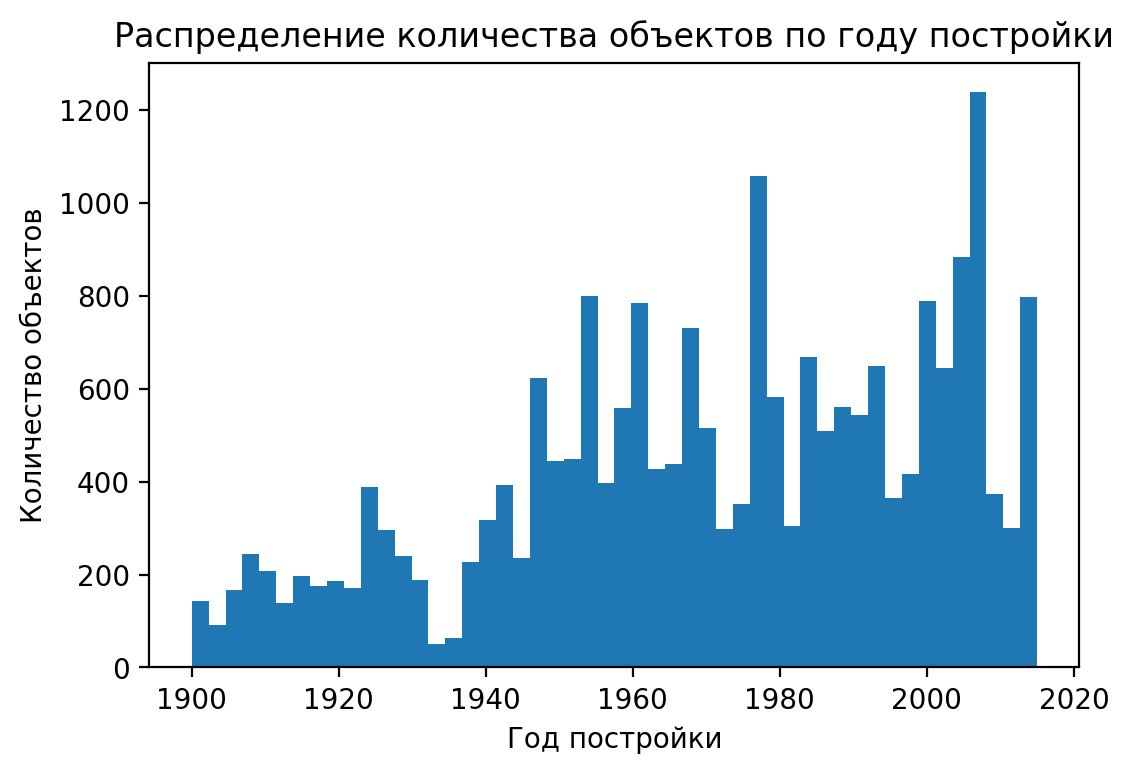

In [27]:
plt.figure(dpi=200)
plt.hist(df['yr_built'], bins=50)
plt.title('Распределение количества объектов по году постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество объектов')
plt.show()

##Условие 2: 2 задача

###2.1 
Изучите распределение домов от наличия вида на набережную

Постройте график

Сделайте выводы

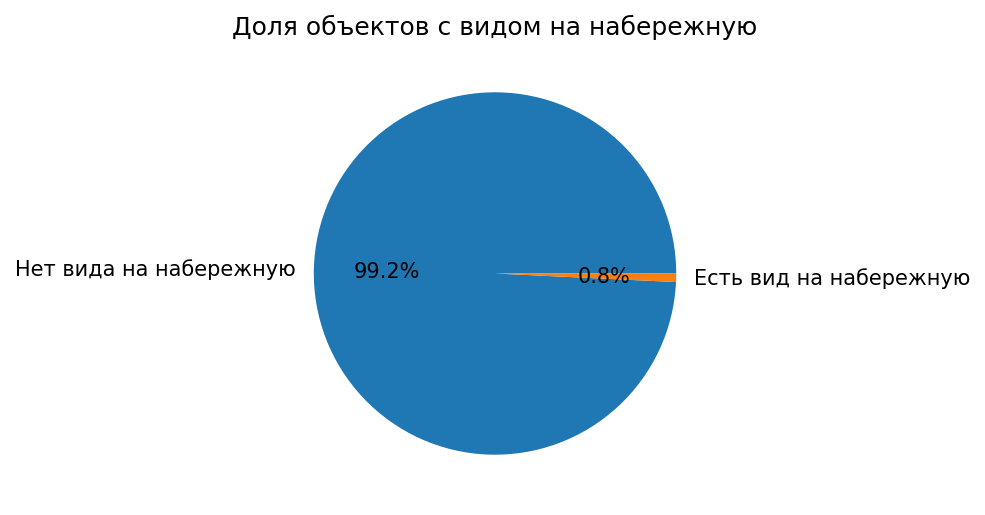

In [52]:
waterfront = df["waterfront"].value_counts()
names = list(map(lambda x: {0: 'Нет вида на набережную', 1: 'Есть вид на набережную'}[x], waterfront.index))
values = waterfront.values

plt.figure(dpi=150)
plt.pie(values, autopct='%1.1f%%', labels=names, )
plt.title('Доля объектов с видом на набережную')
plt.show()

###2.2 
Изучите распределение этажей домов

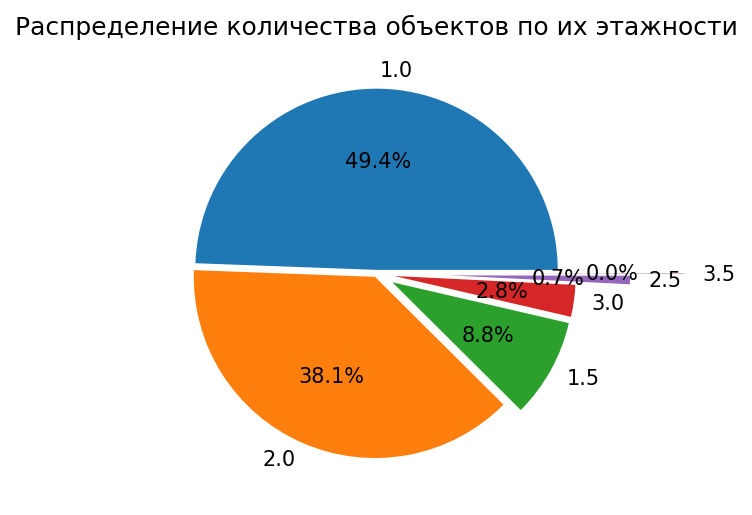

In [72]:
floors = df["floors"].value_counts()
names = floors.index
values = floors.values

plt.figure(dpi=150)
explode = [0.02, 0.02, 0.1, 0.1, 0.4, 0.7]
plt.pie(values, autopct='%1.1f%%', explode=explode, labels=names)
plt.title('Распределение количества объектов по их этажности')
plt.show()

###2.3 
Изучите распределение состояния домов

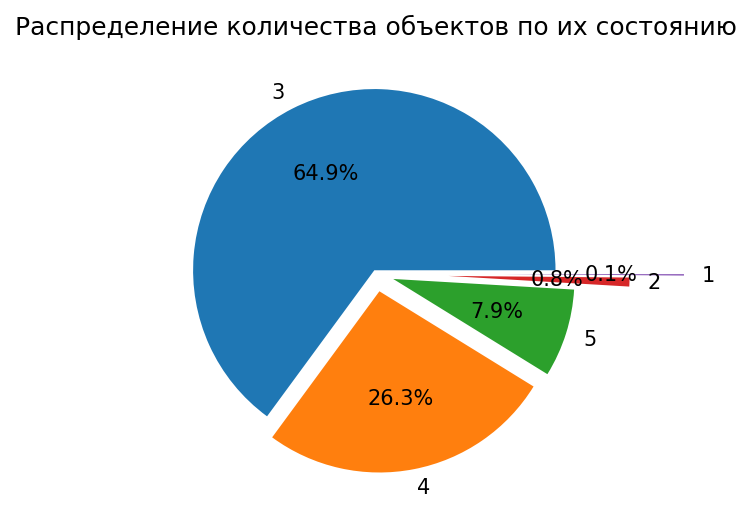

In [75]:
condition = df["condition"].value_counts()
names = condition.index
values = condition.values

plt.figure(dpi=150)
explode = [0.02, 0.1, 0.1, 0.4, 0.7]
plt.pie(values, autopct='%1.1f%%', explode=explode, labels=names)
plt.title('Распределение количества объектов по их состоянию')
plt.show()

##Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [161]:
corr_matrix = df.corr()
corr_matrix.sort_values('price', ascending=False)['price']

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

Таблица корреляции различных параметров от цены. Самая высокая корреляция с величиной жилой площади. При построении диаграмм и графиков, будут рассматриваться зависимости параметров с корреляцией не менее 0,2.

In [162]:
to_drop = list(corr_matrix[corr_matrix['price'] < 0.2].index)
df2 = df.drop(columns=to_drop)
corr_matrix2 = df2.corr()

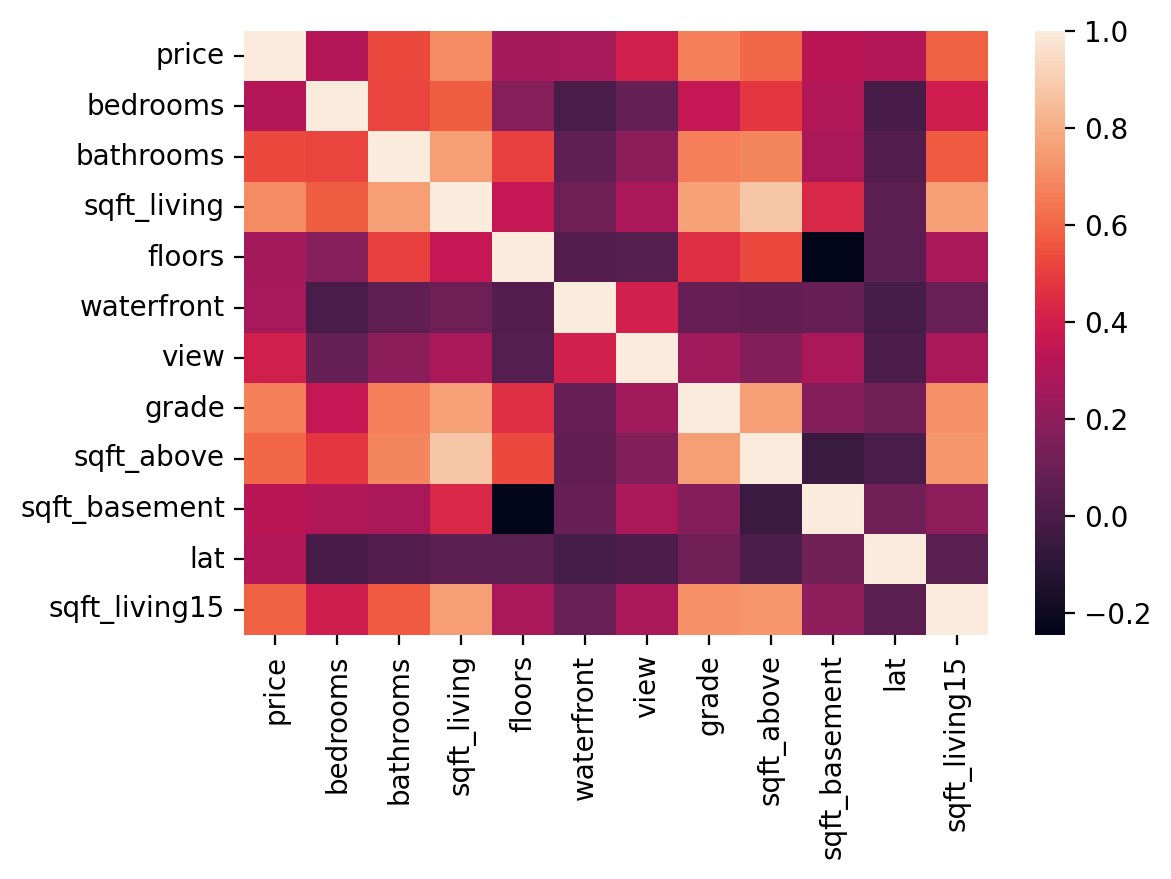

In [163]:
plt.figure(dpi=200)
sns.heatmap(corr_matrix2)
plt.show()

На матрице корреляции чем светлее персиковые клетки, тем выше уровень корреляции. Чем клетки темнее, тем корреляция ниже. Таким образом, самый высокий уровень корреляции между жилой площадбю и площадью над уровнем земли. А самый низкий - между количеством этажей и площадью цокольных этажей.

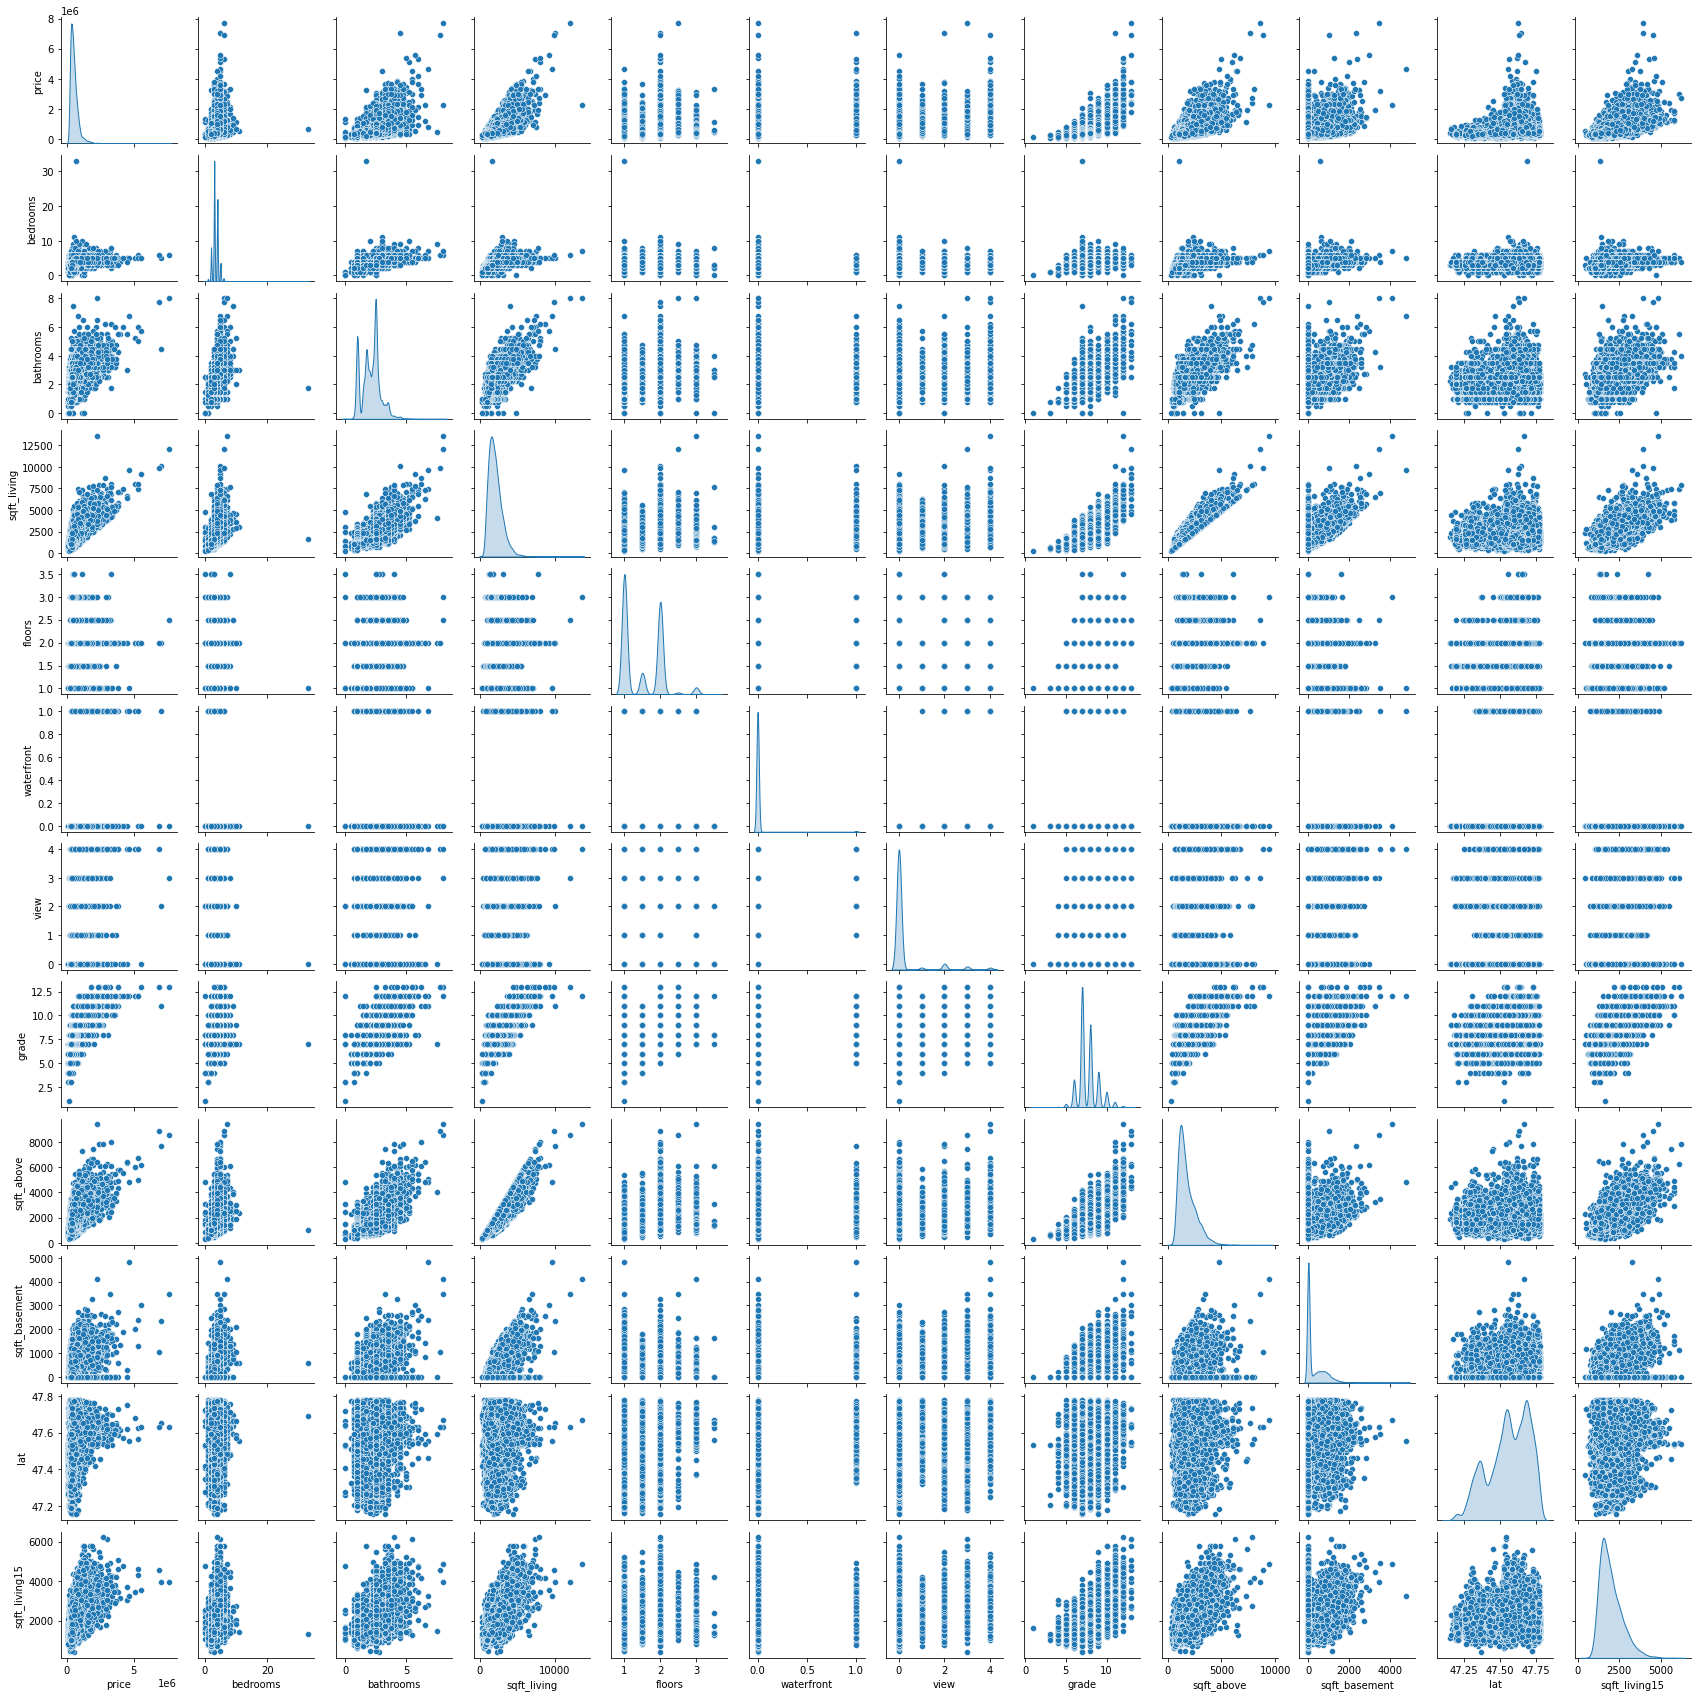

In [164]:
sns.pairplot(df2, height=2, kind="scatter", diag_kind="kde")
plt.show()

Представлены точечные диаграммы между парами параметров, кроме отфильтрованных. На диагонали плотность распределения количества квартир по каждому параметру.

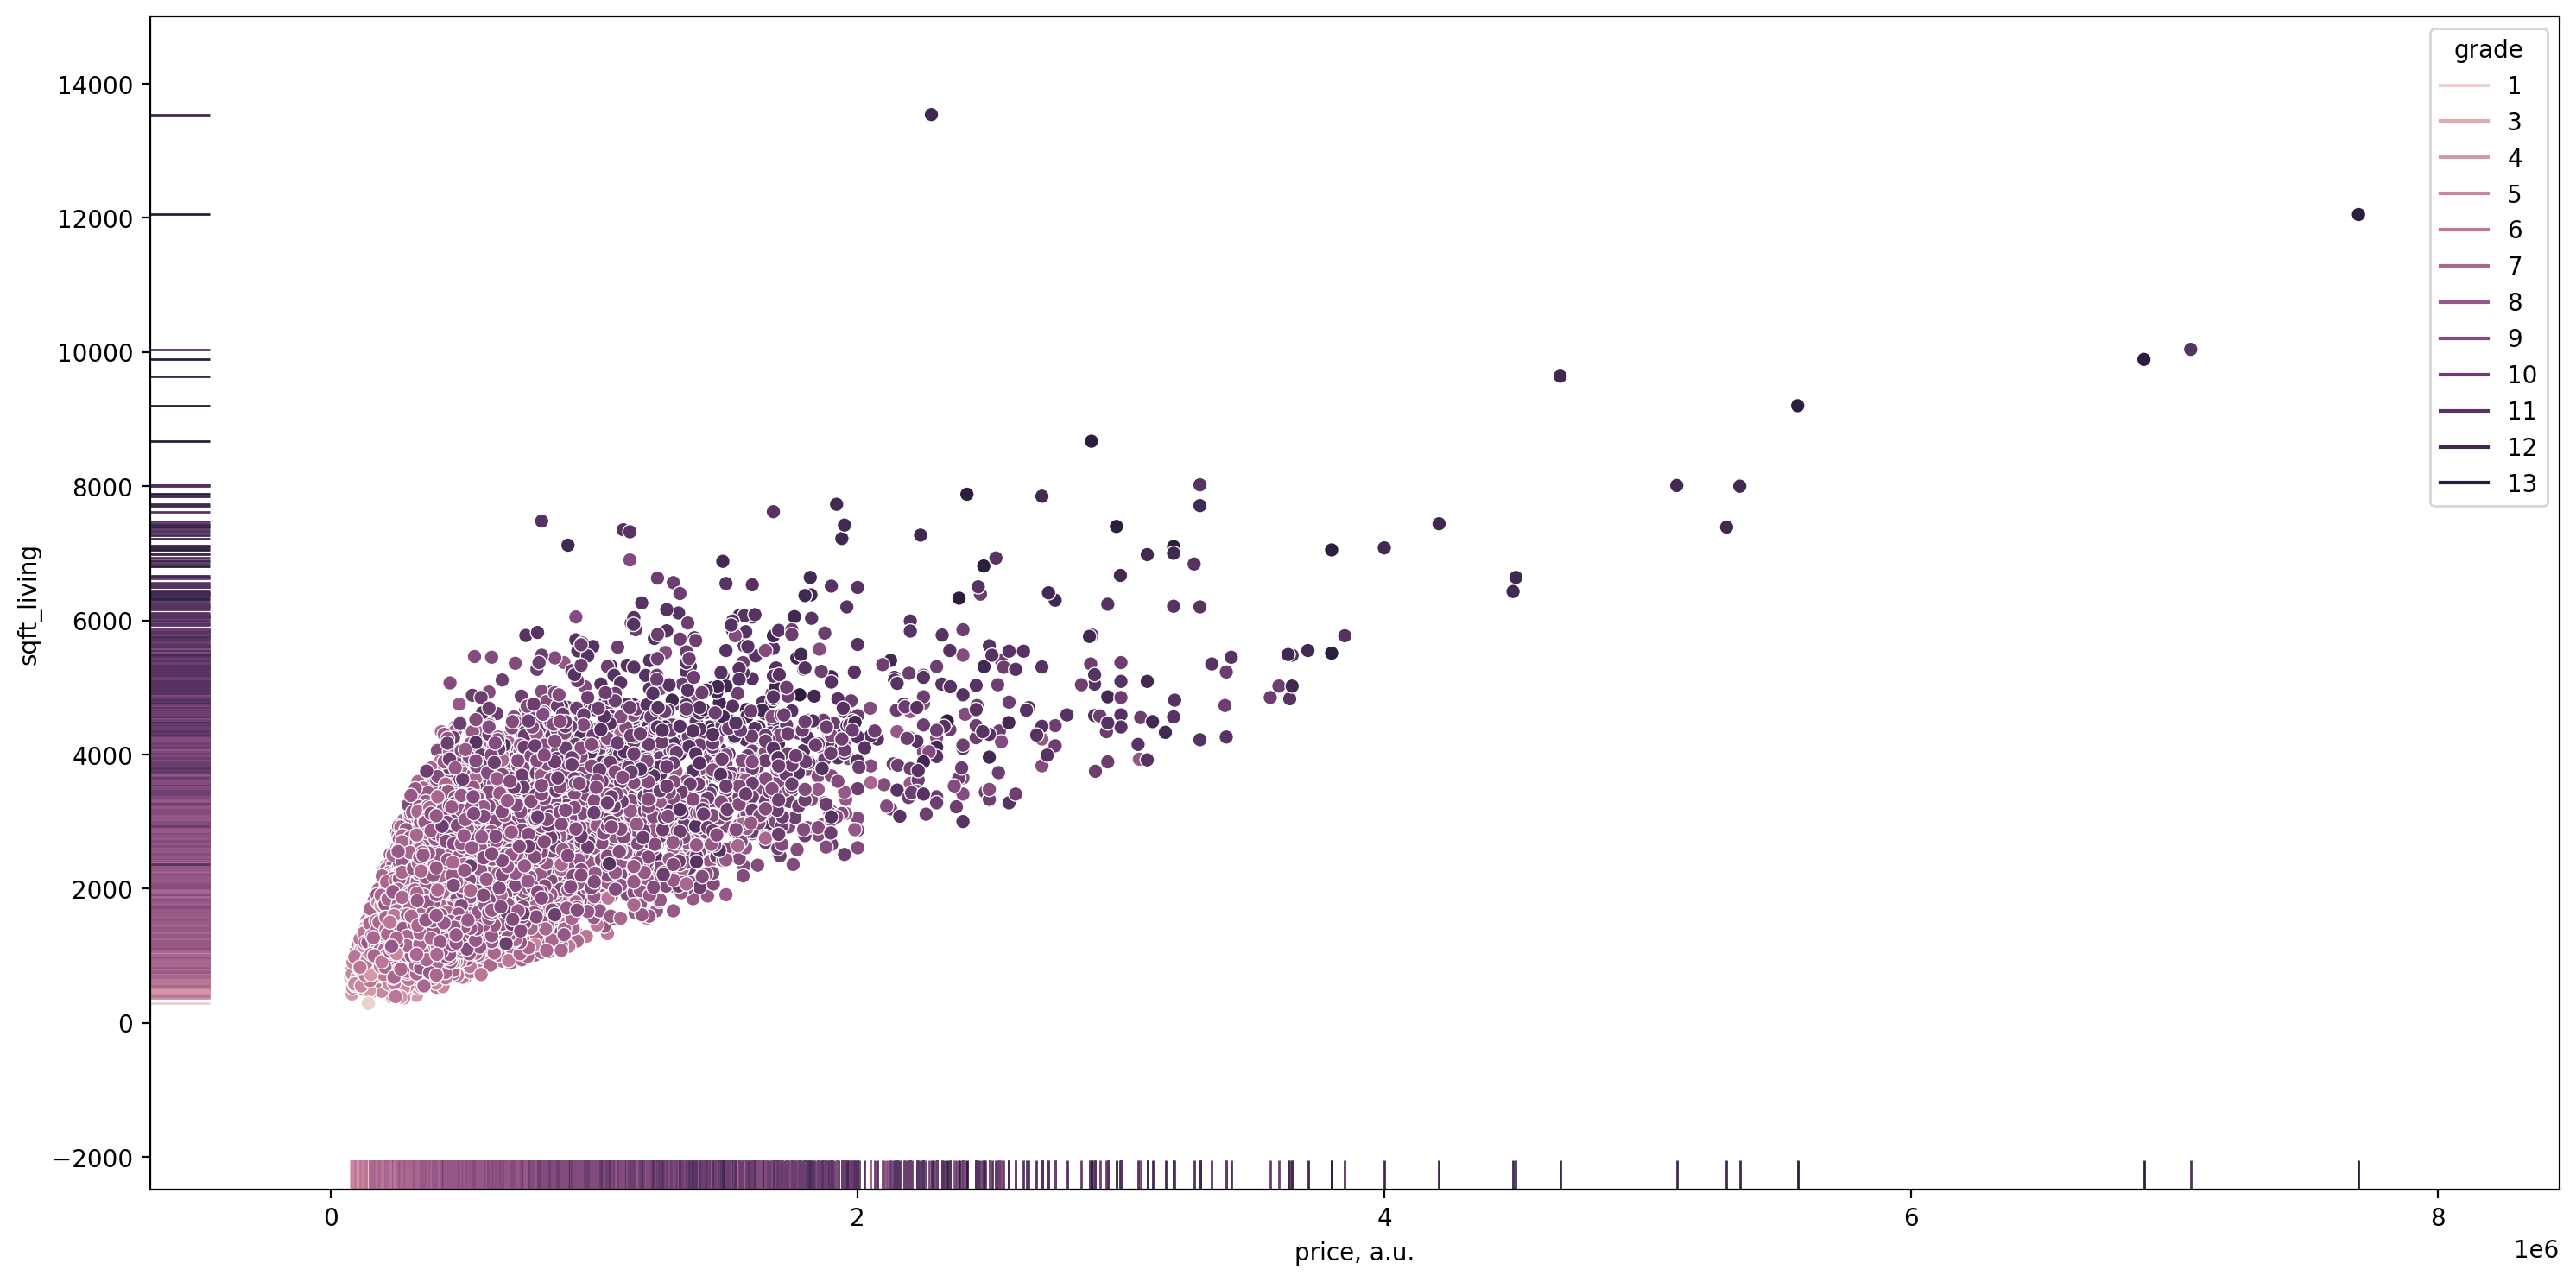

In [171]:
plt.figure(figsize=(18, 9), dpi=200)
sns.scatterplot(data=df, x="price", y='sqft_living', hue='grade')
sns.rugplot(data=df, x="price", y='sqft_living', hue='grade')
plt.ylabel('sqft_living')
plt.xlabel('price, a.u.')
plt.show()

На этой диаграмме показан вклад двух наиболее значимых параметров, влияющих на цену - площадь жилья и его оценка. Более темные точки в среднем находятся выше и правее, значит, большее по площади жилье с более высокой ценой имеет более высокую оценку.

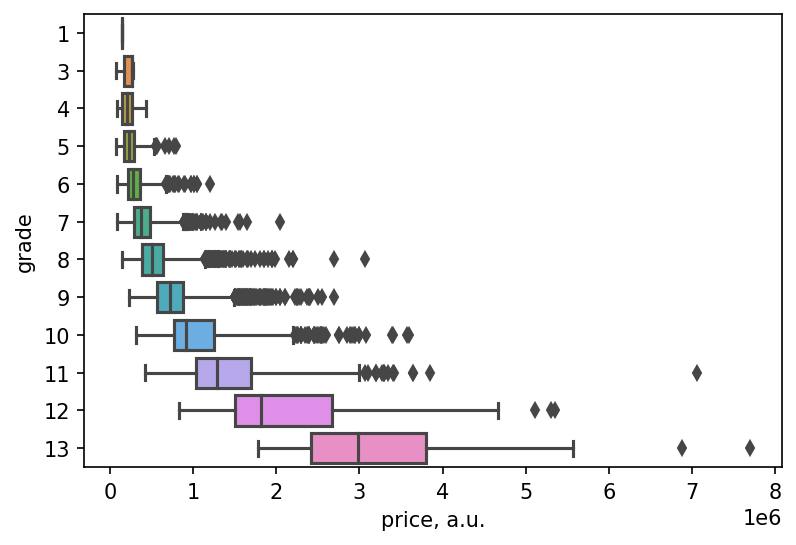

In [188]:
for descriptor in ['grade']:
  plt.figure(dpi=150)
  sns.boxplot(data=df, x="price", y=descriptor, orient='h', whis=2)
  plt.ylabel(descriptor)
  plt.xlabel('price, a.u.')
  plt.show()

На рисунке представлены распределения цен в зависимости от оценки (grade). Боксы показывают 1 квартиль распределения вокруг медианного значения. Также ромбики отражают точки выпадающие из дипапзона боксов и усов (whiskers). Видно нелинейное увеличение медианной цены объекта с повышением оценки и всего распределения.

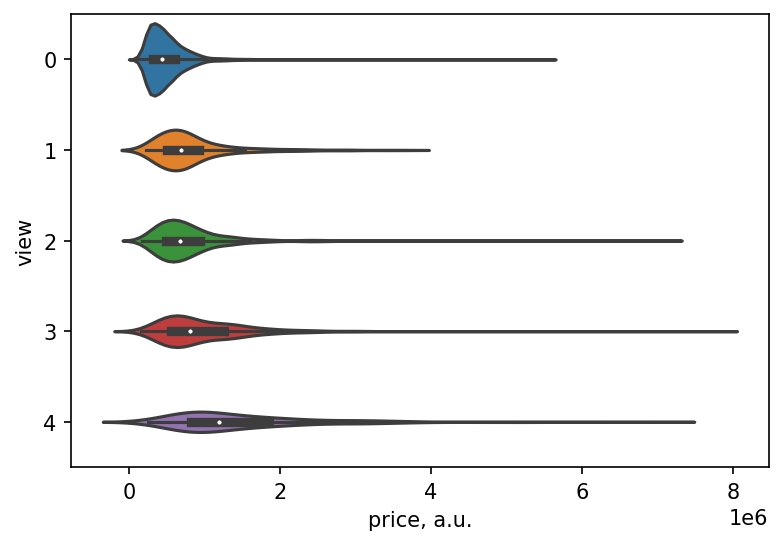

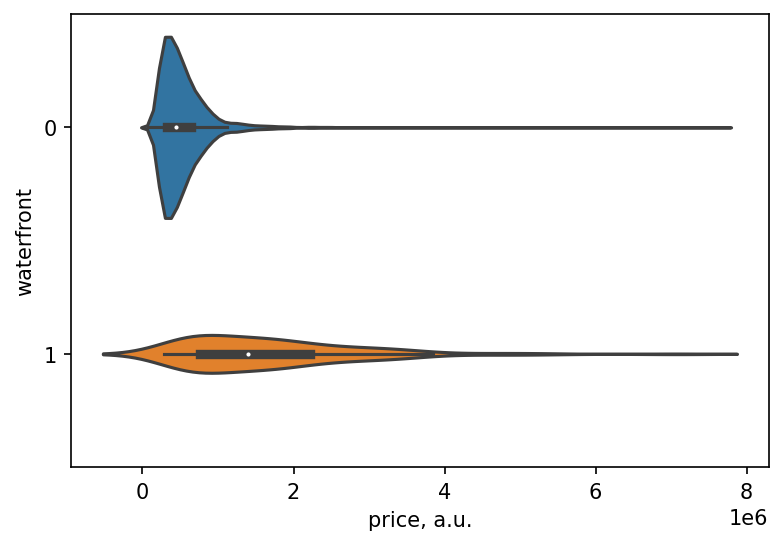

In [185]:
for descriptor in ['view', 'waterfront']:
  plt.figure(dpi=150)
  sns.violinplot(data=df, x="price", y=descriptor, orient='h')
  plt.ylabel(descriptor)
  plt.xlabel('price, a.u.')
  plt.show()

Далее построен еще один тип графика (violin), Который отображает распределение цены в зависимости от двух категориальных признаков - вид по шкале от 0 до 4 и вид на набережную (1 - есть, 0 - нет). Виден небольшой дрейф распределения в сторону увеличения цены при росте оценки вида из объекта, при этом распределение становится существнно более широким, что говорит о том, что объекты с плохим видом в большинстве случаев имеют низкую цену, однако объекты с хорошим видом имеют более широкий ценовой диапазон. Аналогично, наличие вида на набережную существенно растягивает распределение цены и увеличивает медианное значение. 

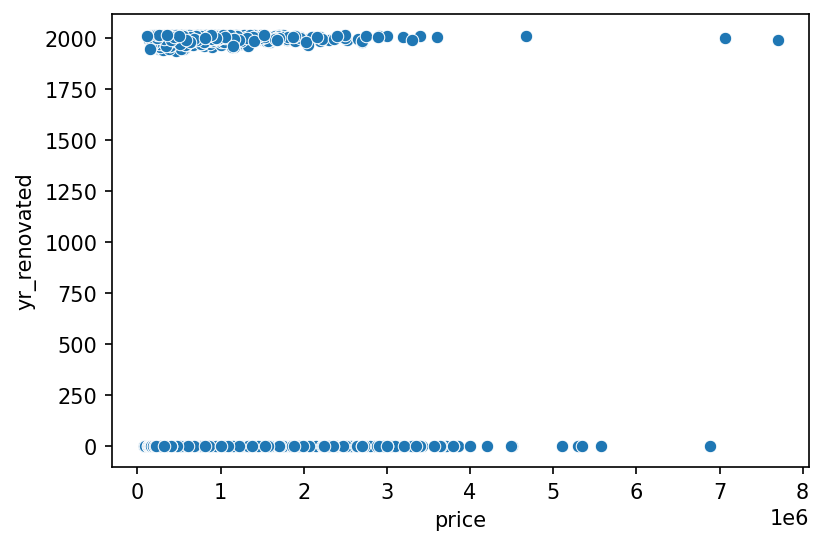

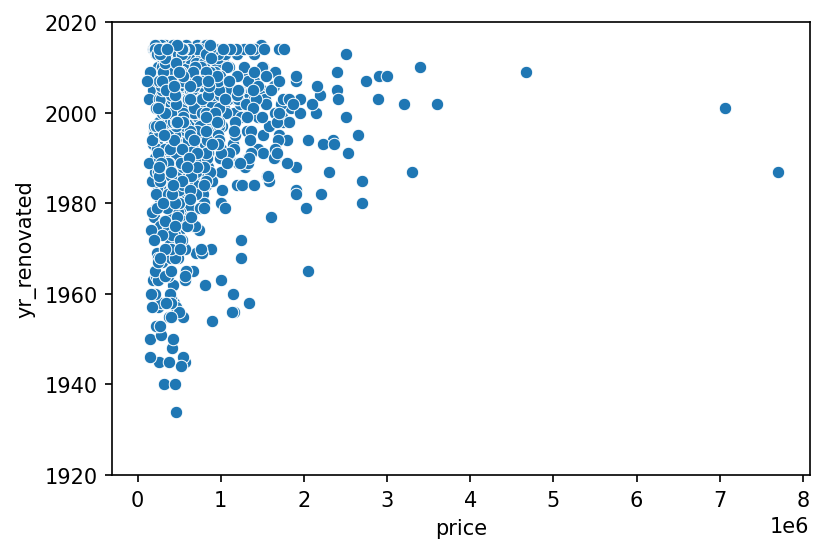

In [190]:
plt.figure(dpi=150)
sns.scatterplot(data=df, x="price", y='yr_renovated')
plt.show()

plt.figure(dpi=150)
sns.scatterplot(data=df, x="price", y='yr_renovated')
plt.ylim(1920,2020)
plt.show()

Здесь отдельно выделен анализ года реновации, как параметра цены объекта.
Последний из двух графиков построен дополнительно так, чтобы на него не попадали значения "0" (дома, в которых реновации не было). Этот график объясняет факт крайне низкого значния корреляции цены с этим параметром, полученного ранее, т.к. отсутствие реновации отражено в датафрейме нулем этого параметра. Поэтому для корректного анализа влияния года реновации/постройки на цену необходимо использовать другой параметр. Например, год постройки, если реновации не было, и год реновации, если она была.